<a href="https://colab.research.google.com/github/Dogechi/dataAnalysis/blob/master/Daniel_Ogechi_Core_W2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# EDA ANALYSIS

In [0]:
# research problem 

# Figure out how we can predict which individuals are most likely to have or use a bank account. 
# Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, 
# while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


In [0]:
# Import libraries 

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [246]:
# Import dataset
# Load the firts 5 records

# shape of the data

print(fd.shape)

fd = pd.read_csv('/content/Financial Dataset - 1.csv')
fd.head(5)



(23524, 13)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [247]:
# Renaming columns
fd.columns= fd.columns.str.replace(" ","_",)
fd.columns = map(str.lower,fd.columns)
fd


,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [248]:
# Missing data

fd.isnull().sum()
# fd

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [249]:
# since we interested in data that has bank account, the null values can be dropped

fd1 = fd.dropna(subset=['has_a_bank_account'],axis=0,how='all')
fd1.isnull().sum()


country                   14
year                       0
uniqueid                   0
has_a_bank_account         0
type_of_location           7
cell_phone_access          3
household_size            28
respondent_age            31
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [0]:
# # perform interpolation for the household and age columns
# fd.iloc[0:6, 6:8].head(10)
# fd.interpolate().iloc[0:6, 6:8]
# fd.isnull().sum()


In [250]:
# use forward ffill for the other categorical columns
fd2['level_of_educuation'] = fd2['level_of_educuation'].replace(6,'NaN')

# fd1 = fd.fillna(method='ffill')
fd1.isnull().sum()


country                   14
year                       0
uniqueid                   0
has_a_bank_account         0
type_of_location           7
cell_phone_access          3
household_size            28
respondent_age            31
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [251]:
# Overview of the data
fd1.describe()

# we can see the household size mean is 3 and age is 38 years
# Std for household being 2 and age being 16
# One can tell that the sample population size has an average age of 38 which covers almost 50% of the data

,year,household_size,respondent_age
count,23488.000000,23460.000000,23457.000000
mean,2016.978968,3.684442,38.809993
std,0.900358,2.280408,16.524923
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [252]:
# number of unique elements in the dataset

print(fd1.nunique())

# We see that the year has 6 unique elements instead of 4 thus showing some anomalies



country                      4
year                         6
uniqueid                  8735
has_a_bank_account           2
type_of_location             2
cell_phone_access            2
household_size              21
respondent_age              85
gender_of_respondent         2
the_relathip_with_head       6
marital_status               5
level_of_educuation          7
type_of_job                 10
dtype: int64


In [253]:
# Drop years not within 2016 -2018

value_list = ['2016', '2017', '2018']
fd2 = fd1[fd1.year.isin(value_list)]
print(fd1.shape)
print(fd2.shape)


(23488, 13)
(23485, 13)


In [254]:
# fd2.drop_duplicates(['uniqueid'], keep='first')
# data["Number_of_households"] < 50,000

fd_kenya = fd2['country'] == 'Kenya'

print(fd2[fd_kenya].shape)

fd_uganda = fd2['country'] == 'Uganda'

print(fd2[fd_uganda].shape)
fd_tz = fd2['country'] == 'Tanzania'
print(fd2[fd_tz].shape)
fd_rw = fd2['country'] == 'Rwanda'
print(fd2[fd_rw].shape)
fd2[fd_rw].duplicated(subset=['uniqueid']).sum()


# fd2[fd_kenya].drop_duplicates(['uniqueid'], keep=False)
# print(fd2.shape)
# fd2[fd_uganda].drop_duplicates(['uniqueid'], keep=False, inplace=True)
# print(fd2.shape)
# fd2[fd_tz].drop_duplicates(['uniqueid'], keep='last', inplace=True)

# print(fd2.shape)
# fd2[fd_rw].drop_duplicates(['uniqueid'], inplace=True)
# print(fd2.shape)





(6066, 13)
(2101, 13)
(6570, 13)
(8734, 13)


0

In [255]:
fd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23485 entries, 0 to 23523
Data columns (total 13 columns):
country                   23471 non-null object
year                      23485 non-null int64
uniqueid                  23485 non-null object
has_a_bank_account        23485 non-null object
type_of_location          23478 non-null object
cell_phone_access         23482 non-null object
household_size            23457 non-null float64
respondent_age            23454 non-null float64
gender_of_respondent      23451 non-null object
the_relathip_with_head    23481 non-null object
marital_status            23453 non-null object
level_of_educuation       23456 non-null object
type_of_job               23455 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [0]:
# Outliers



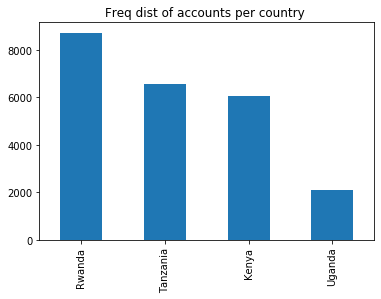

In [256]:
# Univariate analysis

fd2['country'].value_counts().plot.bar(title='Freq dist of accounts per country ')

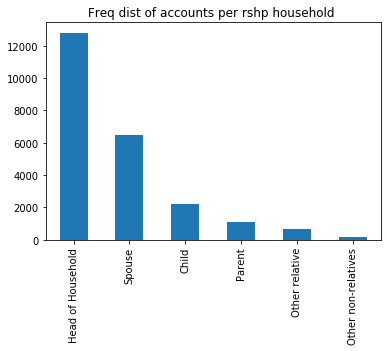

In [257]:
fd2['the_relathip_with_head'].value_counts().plot.bar(title='Freq dist of accounts per rshp household ')


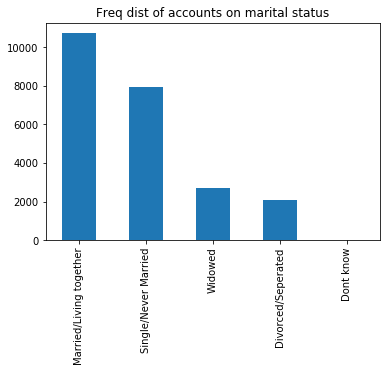

In [258]:
fd2['marital_status'].value_counts().plot.bar(title='Freq dist of accounts on marital status')


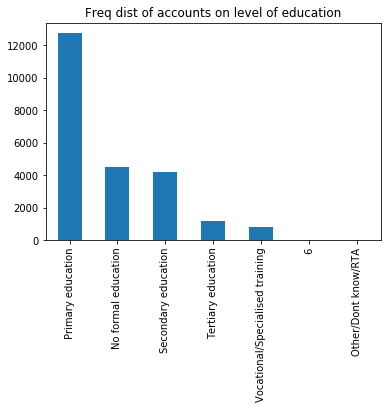

In [259]:
fd2['level_of_educuation'].value_counts().plot.bar(title='Freq dist of accounts on level of education')


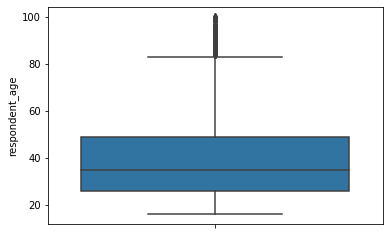

In [260]:
sns.boxplot(y=fd2['respondent_age'])

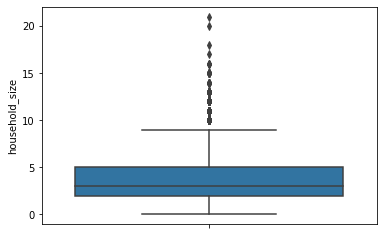

In [261]:
sns.boxplot(y=fd2['household_size'])


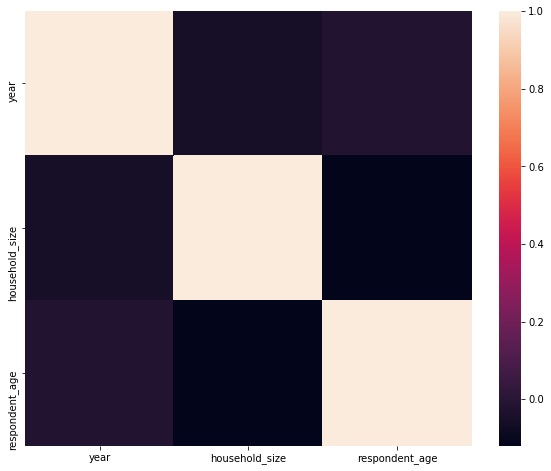

In [262]:
# coorelation matrix 

f, ax = plt.subplots(figsize=(10, 8))
corr = fd2.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [264]:
fd2

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [284]:
# Frequency table for accounts
fd2.has_a_bank_account.value_counts()

No     20177
Yes     3308
Name: has_a_bank_account, dtype: int64

In [285]:
fd2.country.value_counts()


Rwanda      8734
Tanzania    6570
Kenya       6066
Uganda      2101
Name: country, dtype: int64

AttributeError: ignored

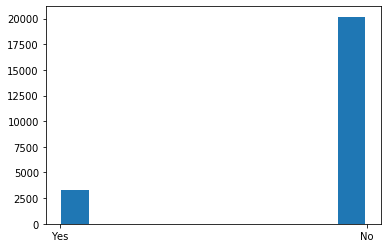

In [290]:
plt.hist(fd2['has_a_bank_account'], bin = 10, histtype ='bar',rwidth = 0.9)